# Imports 

In [1]:
import math

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error

/home/eldmitro/anaconda2/lib/python2.7/site-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/home/eldmitro/anaconda2/lib/python2.7/site-packages/sklearn/utils/__init__.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .murmurhash import murmurhash3_32
/home/eldmitro/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/home/eldmitro/anaconda2/lib/python2.7/site-packages/scipy/linalg/__init__.py:202: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/home/eldmitro/anaconda2/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate 

---

# Methods

In [4]:
def PolynomFeatures(X, deg):
    assert X.shape[1] == 1
    X_res = np.ones(shape=X.shape)
    
    for i in range(1, deg + 1):
        X_res = np.hstack((X ** i, X_res))
        
    return X_res

# Linear model training 

## dim 1

In [5]:
noise = np.random.normal(size=20)
x = np.random.uniform(0, 2 * math.pi, 20)
sin_x = np.sin(x)

In [6]:
X_train = x[np.newaxis].T
y_train = sin_x + noise

In [7]:
X_train = np.hstack((X_train, np.ones(shape=(20, 1))))

In [8]:
lin_model = LinearRegression(fit_intercept=False)
lin_model.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

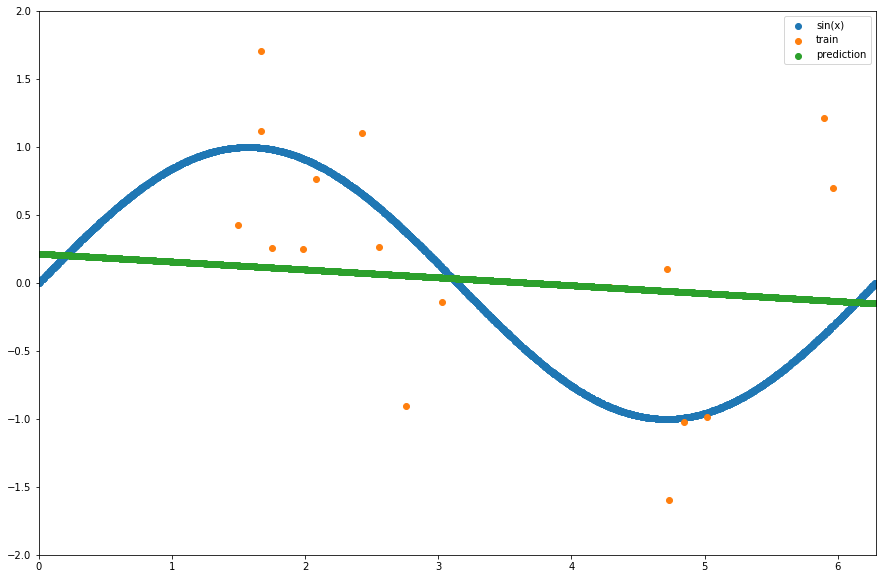

In [9]:
x_plotting = np.random.uniform(0, 2 * math.pi, 3000)
sin_x_plotting = np.sin(x_plotting)

plt.figure(figsize=(15, 10))
plt.xlim(0, 2 * math.pi)
plt.ylim(-2, 2)
plt.scatter(x_plotting, sin_x_plotting, label='sin(x)')

plt.scatter(x, y_train, label='train')

pred = lin_model.coef_[0] * (x_plotting) + lin_model.coef_[1]
plt.scatter(x_plotting, pred, label='prediction')
plt.legend()

## dim 3

In [10]:
X_train_3 = PolynomFeatures(x[np.newaxis].T, 3)
y_train_3 = y_train

In [11]:
lin_model_3 = LinearRegression(fit_intercept=False)
lin_model_3.fit(X=X_train_3, y=y_train_3)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

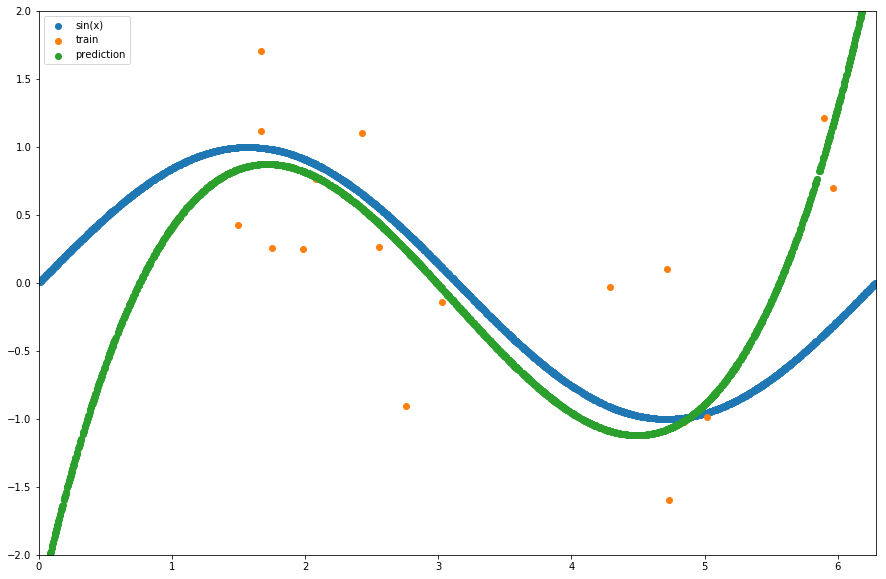

In [12]:
x_plotting = np.random.uniform(0, 2 * math.pi, 3000)
x_plotting_poly = PolynomFeatures(x_plotting[np.newaxis].T, 3)
sin_x_plotting = np.sin(x_plotting)

plt.figure(figsize=(15, 10))
plt.xlim(0, 2 * math.pi)
plt.ylim(-2, 2)
plt.scatter(x_plotting, sin_x_plotting, label='sin(x)')

plt.scatter(x, y_train_3, label='train')

pred = x_plotting_poly.dot(lin_model_3.coef_)
plt.scatter(x_plotting, pred, label='prediction')
plt.legend()

## dim 7

In [13]:
X_train_7 = PolynomFeatures(x[np.newaxis].T, 7)
y_train_7 = y_train

In [14]:
lin_model_7 = LinearRegression(fit_intercept=False)
lin_model_7.fit(X=X_train_7, y=y_train_7)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

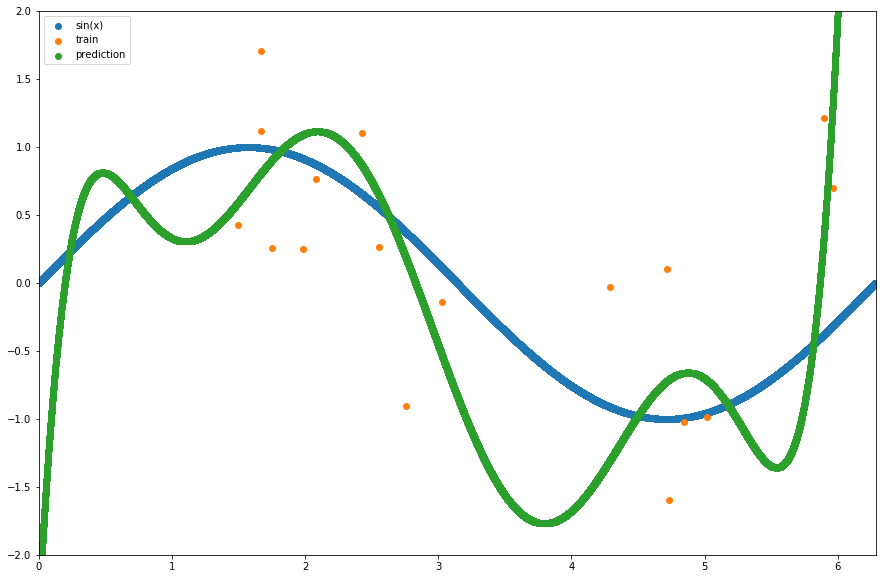

In [15]:
x_plotting = np.random.uniform(0, 2 * math.pi, 30000)
x_plotting_poly = PolynomFeatures(x_plotting[np.newaxis].T, 7)
sin_x_plotting = np.sin(x_plotting)

plt.figure(figsize=(15, 10))
plt.xlim(0, 2 * math.pi)
plt.ylim(-2, 2)
plt.scatter(x_plotting, sin_x_plotting, label='sin(x)')

plt.scatter(x, y_train_7, label='train')

pred = x_plotting_poly.dot(lin_model_7.coef_)
plt.scatter(x_plotting, pred, label='prediction')
plt.legend()

**Оверфитнулась моделька :(**

## Validation

In [16]:
X_val = np.random.uniform(0, 2 * math.pi, 100)
y_val = np.sin(X_val) + np.random.normal(size=100)

In [17]:
X_val_1 = PolynomFeatures(X_val[np.newaxis].T, 1)
X_val_3 = PolynomFeatures(X_val[np.newaxis].T, 3)
X_val_7 = PolynomFeatures(X_val[np.newaxis].T, 7)

In [18]:
y_1 = lin_model.predict(X_val_1)
y_3 = lin_model_3.predict(X_val_3)
y_7 = lin_model_7.predict(X_val_7)

In [19]:
print "Dim 1: {}".format(mean_squared_error(y_true=y_val, y_pred=y_1))
print "Dim 3: {}".format(mean_squared_error(y_true=y_val, y_pred=y_3))
print "Dim 7: {}".format(mean_squared_error(y_true=y_val, y_pred=y_7))

Dim 1: 1.52353187526
Dim 3: 1.47219494848
Dim 7: 2.55295272106


**Легко видеть, что первая моделька достаточно проста для апроксимации. Третья - слижком сложная, обуч. выборку запомнила, 
общую зависимость не выудила, на тесте проиграла( Ну и бог с ней, будем апроксимировать третьей степенью**

**Да, тестили на отложенной выборке, а не на CV. Но несложно понять, что на CV будут аналогичные результаты**

---

## Methods

In [20]:
treshhold = lambda x: int(x < 0)
mse = lambda x: (x - 1) ** 2
hinge = lambda x: max(0, 1 - x)
log_loss = lambda x: math.log(1 + math.exp(-x), 2)

## Bin classification 

Доказательство того, что $$\arg\min_{w} \sum_{x, y} \ln \big(1 + \exp(-yw^Tx )) \big)$$ - максимизация правдоподобия, приводится во множестве литературы (https://github.com/esokolov/ml-course-hse/blob/master/2017-fall/lecture-notes/lecture05-linclass.pdf), поэтому их, наверное, можно опустить( 

In [21]:
np.random.seed = 43

In [22]:
losses = [treshhold, mse, hinge, log_loss]
losses_labels = ['treshold', 'MSE', 'Hinge', 'Log loss']
losses = [np.vectorize(x) for x in losses]

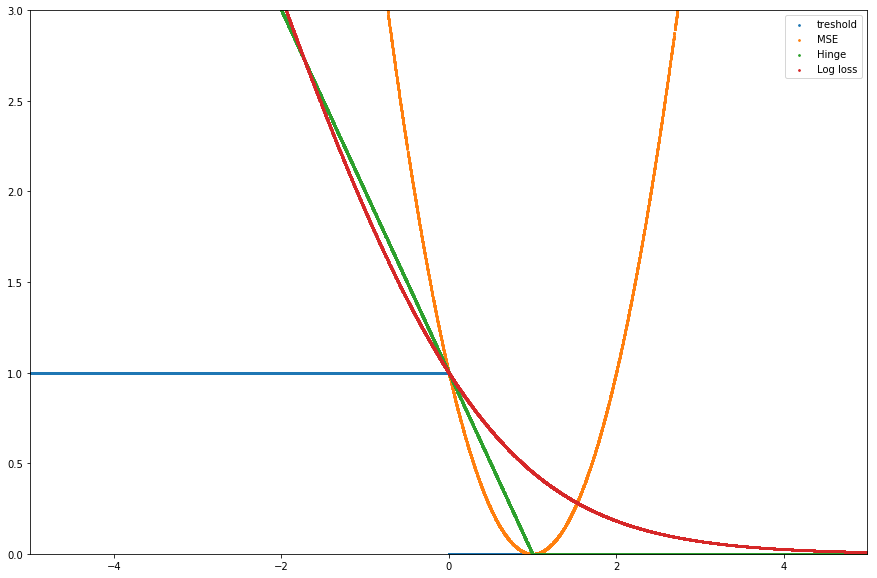

In [23]:
x = np.random.uniform(-5, 5, 15000)

plt.figure(figsize=(15, 10))
plt.xlim(-5, 5)
plt.ylim(0, 3)
for loss, label in zip(losses, losses_labels):
    y = loss(x)
    
    plt.scatter(x, y, label=label, s=3)
    
plt.legend()

In [24]:
exp_val = [
    [1, 10],
    [4, 4]
]

covariance = [
    [
        [1, 0.3],
        [0.3, 4]
    ],
    [
        [1, 0.1],
        [0.1, 4]
    ]
]

In [25]:
pos_class = np.random.multivariate_normal(exp_val[0], covariance[0], 100)
neg_class = np.random.multivariate_normal(exp_val[1], covariance[1], 100)

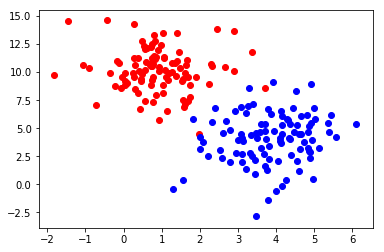

In [26]:
classes = [pos_class, neg_class]
cmap = ['red', 'blue']

for obj, col in zip(classes, cmap):
    plt.scatter(obj[:, 0], obj[:, 1], c=col)

In [27]:
X = np.vstack(classes)
y = np.array([1] * 100 + [-1] * 100)[np.newaxis].T

In [28]:
w = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)

In [29]:
w

array([[-0.33262053],
       [ 0.11213199]])

In [30]:
line = lambda x: -w[0] * x / w[1]
line = np.vectorize(line)

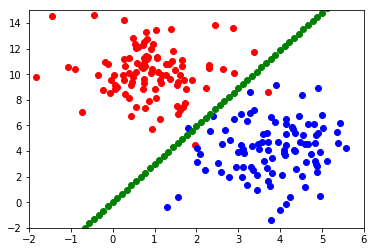

In [31]:
classes = [pos_class, neg_class]
cmap = ['red', 'blue']

plt.xlim(-2, 6)
plt.ylim(-2, 15)
for obj, col in zip(classes, cmap):
    plt.scatter(obj[:, 0], obj[:, 1], c=col)
    
x = np.linspace(-3, 8, 100)
y = line(x)

plt.scatter(x, y, c='g')

Для данной размерности ассимптотика линейная засчет низкой размерности <br>
В общем случае - кубическая

## Methods

In [32]:
q = lambda x, y: x ** 2 + y ** 2
q = np.vectorize(q)

In [33]:
ros_o = lambda x, y: (1 - x) ** 2 + 100 * (y - x ** 2) ** 2
ros = np.vectorize(ros_o)

In [34]:
def q_grad(pos):
    return np.array([2 * pos[0], 2 * pos[1]])

In [35]:
def ros_grad(pos):
    return np.array([400 * (pos[0] ** 3) - 400 * pos[0] * pos[1] + 2 * pos[0] - 2,
                     -200 * (pos[0] ** 2) + 200 * pos[1]])

In [36]:
def GD_step(pos, f_grad, it, lr):
    grad = f_grad(pos)
        
    if (np.inf in np.abs(grad)):
        return None, None
    
    if (np.isnan(grad).any()):
        return None, None
    
    if (np.abs(grad - np.array([0, 0])) < 0.001).all():
        return None, None
    
    return tuple(pos - lr * f_grad(pos))

## GD

Для простоты возьмем симметричный парабаллоид

In [37]:
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
x, y = np.meshgrid(x, y)

z = q(x, y)

**Я не придумал, как красиво рисовать градиенты на линиях уровня, поэтому на графике такой колхоз(**

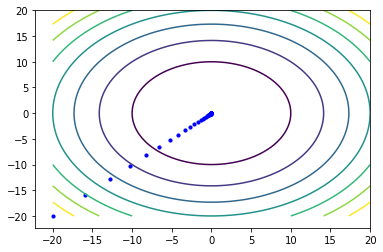

In [38]:
epochs = 300
pos = (-20, -20)
LR = 0.1

plt.contour(x, y, z)

for i in range(epochs):
    plt.scatter(pos[0], pos[1], s=10, c='b')
    pos = GD_step(pos, q_grad, i, LR)
    
    if (pos[0] is None):
        break

In [39]:
x = np.linspace(-2, 2, 1000)
y = np.linspace(-1, 3, 1000)
x, y = np.meshgrid(x, y)

z = ros(x, y)

Градиент дикий у нашей функции, нужен низкий LR

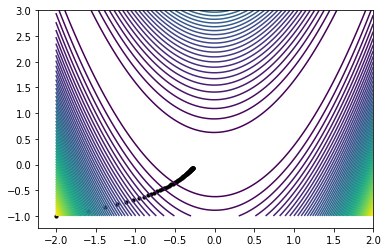

In [40]:
epochs = 3000
pos = (-2, -1)
LR = 0.0001

plt.contour(x, y, z, 75)

for i in range(epochs):
    plt.scatter(pos[0], pos[1], s=10, c='black')
    f_value = ros_o(pos[0], pos[1])
    pos = GD_step(pos, ros_grad, i, LR)
    
    if (np.isnan(pos[0])):
        break
        
    if abs(ros_o(pos[0], pos[1]) - f_value) < 0.1:
        break
    
    if (pos[0] is None):
        break

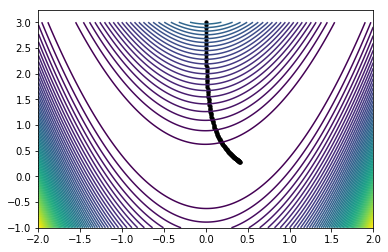

In [41]:
epochs = 3000
pos = (0, 3)
LR = 0.0001

plt.contour(x, y, z, 75)

for i in range(epochs):
    plt.scatter(pos[0], pos[1], s=10, c='black')
    f_value = ros_o(pos[0], pos[1])
    pos = GD_step(pos, ros_grad, i, LR)
    
    if (np.isnan(pos[0])):
        break
        
    if abs(ros_o(pos[0], pos[1]) - f_value) < 0.1:
        break
    
    if (pos[0] is None):
        break

Имея возможность отрисовать линни уровня функции, не составляет никаких проблем подобрать начальную позицию и шаг спуска. Однако, в условиях настоящего боя начальная точка - берется случайной, например из норм. распределения, и LR подбирается по сходимости. <br>

К слову, если бы мы оставили шаг ГС такой же, как в прошлой задаче, то при некоторых инициализациях мы бы улетели "в космос"

Рассмотрим такой случай:

In [42]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-5, 3, 1000)
x, y = np.meshgrid(x, y)

z = ros(x, y)

/home/eldmitro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.
/home/eldmitro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/home/eldmitro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/home/eldmitro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/home/eldmitro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


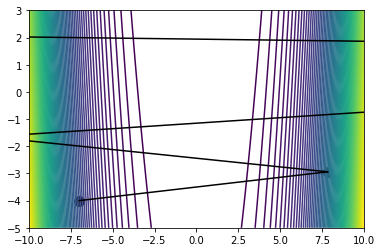

In [43]:
epochs = 3000
pos_prev = (-7, -4)
pos = (-7, -4)
LR = 0.0001

plt.xlim(-10, 10)
plt.ylim(-5, 3)
plt.contour(x, y, z, 100)

for i in range(epochs):
    plt.scatter(pos[0], pos[1], s=100, c='black')
    plt.plot((pos[0], pos_prev[0]), (pos[1], pos_prev[1]),c='black')    
    f_value = ros_o(pos[0], pos[1])
    
    pos_prev = pos
    pos = GD_step(pos, ros_grad, i, LR)
    
    if (pos[0] is None):
        break
   
    if abs(ros_o(pos[0], pos[1]) - f_value) < 0.1:
        break

Как мы видим, будучи достаточно далеко от минимума, точки имеют большой градиент. Шаг по градиенту откидывает нас все и дальше от глоб. минимума, пока не улетим "в космос", собственно, как мы и хотели

Попробуем простую эвристику, LR, зависимый от номера итерации:

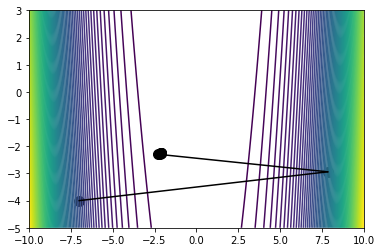

In [44]:
epochs = 3000
pos_prev = pos = (-7, -4)
LR = 0.0001

plt.xlim(-10, 10)
plt.ylim(-5, 3)
plt.contour(x, y, z, 100)

for i in range(1, epochs):
    LR = LR / i
    
    plt.scatter(pos[0], pos[1], s=100, c='black')
    plt.plot((pos[0], pos_prev[0]), (pos[1], pos_prev[1]),c='black')    
    f_value = ros_o(pos[0], pos[1])
    
    pos_prev = pos
    pos = GD_step(pos, ros_grad, i, LR)
    
    if (pos[0] is None):
        break
   
    if abs(ros_o(pos[0], pos[1]) - f_value) < 0.1:
        break

Лучше, но не решает всех проблем

## GD and Dots

In [45]:
exp_val = [
    [1, 10],
    [4, 4]
]

covariance = [
    [
        [1, 0.3],
        [0.3, 4]
    ],
    [
        [1, 0.1],
        [0.1, 4]
    ]
]

In [99]:
pos_class = np.random.multivariate_normal(exp_val[0], covariance[0], 100)
neg_class = np.random.multivariate_normal(exp_val[1], covariance[1], 100)

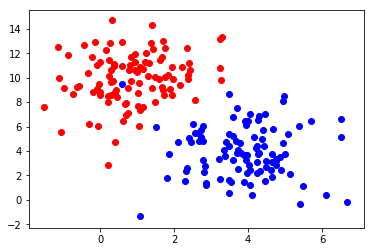

In [100]:
classes = [pos_class, neg_class]
cmap = ['red', 'blue']

for obj, col in zip(classes, cmap):
    plt.scatter(obj[:, 0], obj[:, 1], c=col)

In [101]:
pos_class = np.hstack((pos_class, np.ones(shape=(len(pos_class), 1))))
neg_class = np.hstack((neg_class, np.ones(shape=(len(neg_class), 1))))

In [102]:
classes = [pos_class, neg_class]

In [103]:
X_train = np.vstack(classes)
y_train = np.array([1] * 100 + [-1] * 100)[np.newaxis].T

In [116]:
sgd_class = SGDClassifier(loss='squared_loss', penalty='none', fit_intercept=False)

In [117]:
sgd_class.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=False, l1_ratio=0.15,
       learning_rate='optimal', loss='squared_loss', max_iter=None,
       n_iter=None, n_jobs=1, penalty='none', power_t=0.5,
       random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [118]:
w = sgd_class.coef_[0]

In [119]:
w = w / np.sqrt(w.dot(w))

In [124]:
w_an = np.linalg.inv((X_train.T).dot(X_train)).dot(X_train.T).dot(y_train)

In [129]:
line_mse = lambda x: -w[2] - w[0] * x / w[1]
line_mse = np.vectorize(line)

line_an = lambda x: -w_an[2] - w_an[0] * x / w_an[1]
line_an = np.vectorize(line)

In [140]:
x = np.linspace(-2, 7, 200)
y = line_mse(x)

In [141]:
y_an = line_an(x)

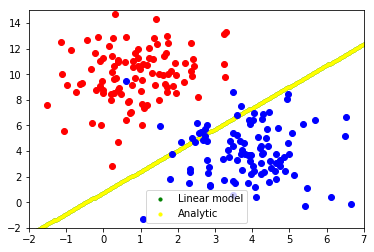

In [142]:
classes = [pos_class, neg_class]
cmap = ['red', 'blue']

plt.xlim(-2, 7)
plt.ylim(-2, 15)

plt.scatter(x, y, c='green', label='Linear model', s=10)
plt.scatter(x, y_an, c='yellow', label='Analytic', s=10)

for obj, col in zip(classes, cmap):
    plt.scatter(obj[:, 0], obj[:, 1], c=col)
    
plt.legend()

В точности совпадают (Вторая прямая тоже есть, она спряталась, я проверял)

---

**На этом моменте я устал... :( **<br>
    
**Насчет слудующих тасок, наверное, стоит пометить: <br>
Adam все затащит, и даже функцию Розенброка**

**Еще хочется несколько слов написать по каждой следующей таске, подметить интересные факты без доказательства делом**

## 6 Таска

**Больше батч - лучше оценка на градиент. Поэтому ошибка будет с увеличением батча сглаживаться, сходиться быстрее, а вместе с этим и точность расти (в некоторых случаях может и не расти, например данные очень однородны т.ч. градиент по 10 элементам - очень точная оценка градиента нашего функционала) **


**Решение аналогичной таски (классификация букв на изображении) есть на этоп репозитории, решение старое, страшное, но решение**

---

In [184]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
x, y = np.meshgrid(x, y)

q = lambda x, y: 10 * (x ** 2) + y ** 2
q = np.vectorize(q)

z = q(x, y)

In [185]:
g = lambda pos: np.array((20 * pos[0], 2 * pos[1]))

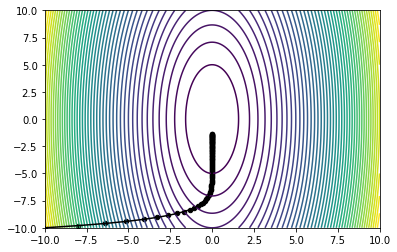

In [186]:
epochs = 100
pos_prev = pos = (-10, -10)
LR = 0.01

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.contour(x, y, z, 50)

for i in range(1, epochs):
    plt.scatter(pos[0], pos[1], s=20, c='black')
    plt.plot((pos[0], pos_prev[0]), (pos[1], pos_prev[1]),c='black')    
    
    pos_prev = pos
    pos = GD_step(pos, g, i, LR)
    
    if (pos[0] is None):
        break

**Видим, что линии уровня вытянуты вдоль оси Oy. Почему это плохо? 
Знаем, что градиент перпендикулярен линиям уровня. Возьмем точку на произвольной линии уровня, сделаем шаг в сторону градиента и увидим, что двигаемся мы не прямо в сторону лок. минимума, а кучеряво вбок. Любой специалист по логике скажет: Нужно сразу ко дну двигаться, зачем делать такой крюк? И правда! Поэтому для следующего раза мы запомним этот вывод и будет знать, что признаки лучше нормировать!**

**"Моментум" жизнь облегчит, т.к. градиент будет выправляться быстрее**

---

# **Искренне извиняюсь, что не доделал лабораторку до конца :(**

## Таски приятные, но объемные